In [1]:
%pip install seaborn
%pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.model_selection import KFold

In [18]:

def load_dataset(data):
    df = pd.read_csv(data)
    df = df.rename(columns={'class':'types'})
    return df

In [21]:
data = 'iris.csv'
dt = load_dataset(data)
dt

,sepal-length,sepal-width,petal-length,petal-width,types
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
def summarize_dataset(dt):
    shapes = dt.shape
    first_lines = dt.head(10)
    statitsdic_df = dt.describe()
    hist = dt.hist(bins=5)
    return f"its shape: {shapes}\nits 10 first lines: \n{first_lines}\n\nits statistical summary:\n{statitsdic_df}\n\nIts distribution:\n {hist}"


"its shape: (150, 5)\nits 10 first lines: \n   sepal-length  sepal-width  petal-length  petal-width        types\n0           5.1          3.5           1.4          0.2  Iris-setosa\n1           4.9          3.0           1.4          0.2  Iris-setosa\n2           4.7          3.2           1.3          0.2  Iris-setosa\n3           4.6          3.1           1.5          0.2  Iris-setosa\n4           5.0          3.6           1.4          0.2  Iris-setosa\n5           5.4          3.9           1.7          0.4  Iris-setosa\n6           4.6          3.4           1.4          0.3  Iris-setosa\n7           5.0          3.4           1.5          0.2  Iris-setosa\n8           4.4          2.9           1.4          0.2  Iris-setosa\n9           4.9          3.1           1.5          0.1  Iris-setosa\n\nits statistical summary:\n       sepal-length  sepal-width  petal-length  petal-width\ncount    150.000000   150.000000    150.000000   150.000000\nmean       5.843333     3.054000    

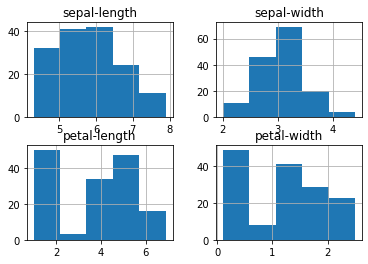

In [24]:
summarize_dataset(dt)

In [6]:
def print_plot_univariate(dt):
    
    sns.scatterplot(x=dt.index, y=dt['sepal-width'], hue=dt['types']).set(title='Line plot of sepal width')

    plt.figure(figsize=(6,6))
    plt.title('Line plot of petal length')
    plt.xlabel('index', fontsize=20)
    plt.ylabel('petal length', fontsize=20)
    plt.plot(dt.index, dt['petal-length'], markevery=1, marker='d')
    for name, group in dt.groupby('types'):
        plt.plot(group.index, group['petal-length'], label=name, markevery=1, marker='d')
    plt.legend()
    plt.show()

    sns.scatterplot(x=dt.index, y=dt['petal-width'], hue=dt['types']).set(title='Line plot of petal width')

    plt.figure(figsize=(6,6))
    plt.title('Line plot of sepal length')
    plt.xlabel('index', fontsize=20)
    plt.ylabel('Sepal length', fontsize=20)
    plt.plot(dt.index, dt['sepal-length'], markevery=1, marker='d')
    for name, group in dt.groupby('types'):
        plt.plot(group.index, group['sepal-length'], label=name, markevery=1, marker='d')
    plt.legend()
    plt.show()

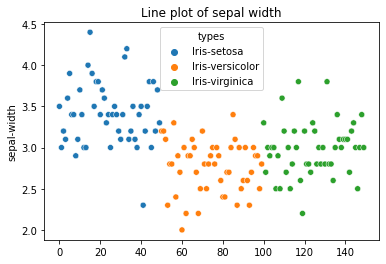

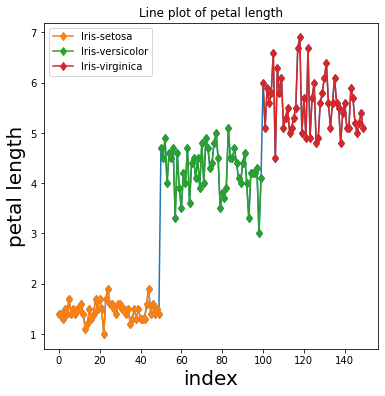

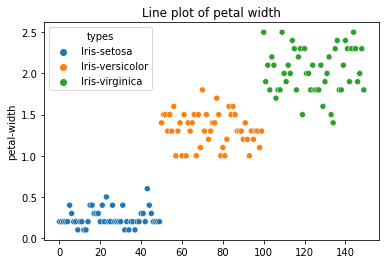

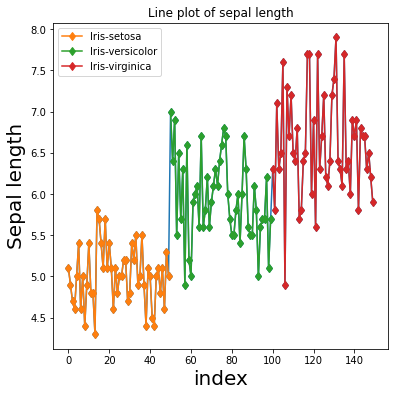

In [23]:
print_plot_univariate(dt)

In [25]:
def print_plot_multivariate(file_data):
    ldr1 = file_data.iloc[:, 0:1]
    ldr2 = file_data.iloc[:, 1:2]
    servo_correction = file_data.iloc[:, 2:3]

    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(ldr2, ldr1, servo_correction)
    ax.set_zlabel('Delta Servo')
    plt.xlabel("LDR2")
    plt.ylabel("LDR1")
    plt.gca().invert_xaxis()
    plt.show()
    # return ldr1, ldr2, servo_correction

C:\Users\user\AppData\Local\Temp\ipykernel_22480\1583050092.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


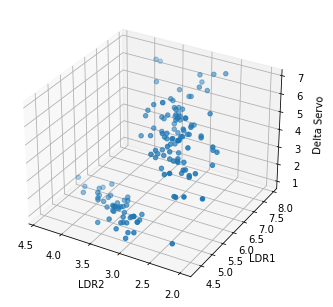

In [26]:
print_plot_multivariate(dt)

In [8]:
def my_print_and_test_models(df):

    # DecisionTree
    model1 = DecisionTreeClassifier()

    # GaussianNB
    model2 = GaussianNB()

    # KNeighbors
    model3 = KNeighborsClassifier()

    # LogisticRegression
    model4 = LogisticRegression(solver='liblinear', multi_class='ovr')

    # LinearDiscriminant
    model5 = LinearDiscriminantAnalysis()

    # SVM
    model6 = SVC(gamma='auto')

    array = df.values
    X = array[:,0:4]
    y = array[:,4]

    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=0.20, random_state=1)

    m1_cv_results = cross_val_score(model1, X_train, Y_train, cv=KFold(n_splits=2), scoring='accuracy')
    m2_cv_results = cross_val_score(model2, X_train, Y_train, cv=KFold(n_splits=2), scoring='accuracy')
    m3_cv_results = cross_val_score(model3, X_train, Y_train, cv=KFold(n_splits=2), scoring='accuracy')
    m4_cv_results = cross_val_score(model4, X_train, Y_train, cv=KFold(n_splits=2), scoring='accuracy')
    m5_cv_results = cross_val_score(model5, X_train, Y_train, cv=KFold(n_splits=2), scoring='accuracy')
    m6_cv_results = cross_val_score(model6, X_train, Y_train, cv=KFold(n_splits=2), scoring='accuracy')
    m1 , m2, m3, m4, m5, m6 = 'DecisionTree', 'GaussianNB', 'KNeighbors', 'LogisticRegression', 'LinearDiscriminant', 'SVM'
    # print('%s: %f (%f)' % (m1, m1_cv_results.mean(), m1_cv_results.std()))
    print(f"{m1}: {m1_cv_results.mean()}, ({m1_cv_results.std()})\n",
        f"{m2}: {m2_cv_results.mean()}, ({m2_cv_results.std()})\n",
        f"{m3}: {m3_cv_results.mean()}, ({m3_cv_results.std()})\n",
        f"{m4}: {m4_cv_results.mean()}, ({m4_cv_results.std()})\n",
        f"{m5}: {m5_cv_results.mean()}, ({m5_cv_results.std()})\n",
        f"{m6}: {m6_cv_results.mean()}, ({m6_cv_results.std()})")

In [27]:
my_print_and_test_models(dt)

DecisionTree: 0.9333333333333333, (0.033333333333333326)
 GaussianNB: 0.95, (0.016666666666666663)
 KNeighbors: 0.9416666666666667, (0.025000000000000022)
 LogisticRegression: 0.8916666666666666, (0.041666666666666685)
 LinearDiscriminant: 0.975, (0.008333333333333304)
 SVM: 0.9666666666666666, (0.016666666666666663)


In [15]:
# echo "# Jupyter_project" >> README.md
# git init
# git add README.md
# git commit -m "first commit"
# git branch -M master
# git remote add origin https://github.com/abd1bayev/Jupyter_project.git
# git push -u origin master